### Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
   * R&D Spend -- Research and devolop spend in the past few years
   * Administration -- spend on administration in the past few years
   * Marketing Spend -- spend on Marketing in the past few years
   * State -- states from which data is collected
   * Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

In [2]:
startup_data=pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
startup_data=startup_data.rename({'R&D Spend':'RDS','Administration':'Administration','Marketing Spend':'Marketing_Spend','State':'State','Profit':'Profit'},axis=1)
startup_data

,RDS,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [21]:
del startup_data['State']
startup_data

,RDS,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### Initial Analysis

In [22]:
startup_data.shape

(50, 4)

In [23]:
startup_data.dtypes

RDS                float64
Administration     float64
Marketing_Spend    float64
Profit             float64
dtype: object

In [24]:
startup_data.isna().sum()

RDS                0
Administration     0
Marketing_Spend    0
Profit             0
dtype: int64

### Assumption Check

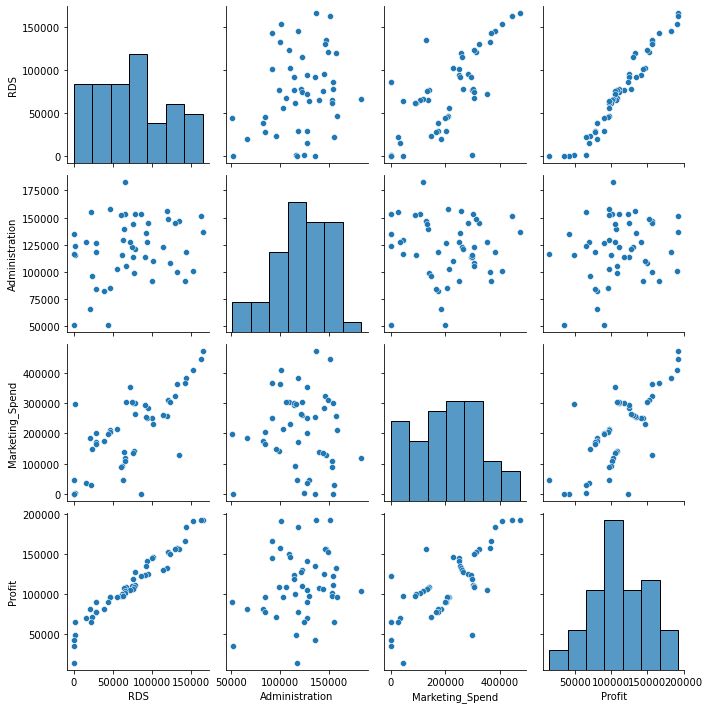

In [25]:
#Linearity Check
sns.pairplot(data=startup_data)
plt.show()

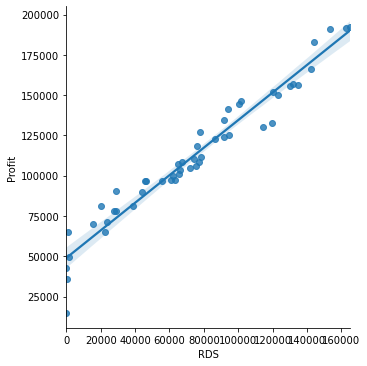

In [26]:
import warnings
warnings.filterwarnings('ignore')
sns.lmplot('RDS','Profit',data=startup_data)
plt.show()

In [27]:
#correlation Matrix
corr_matrix=startup_data.corr()
corr_matrix

,RDS,Administration,Marketing_Spend,Profit
RDS,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


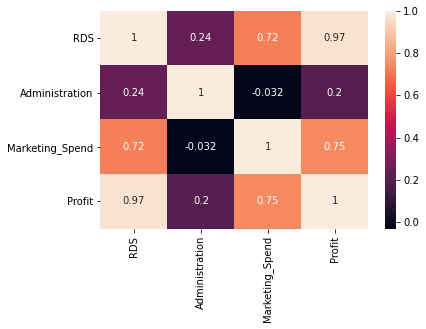

In [28]:
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

###  Model Building || Model Traning

In [29]:
import statsmodels.formula.api as smf

In [30]:
model=smf.ols('Profit~RDS+Administration+Marketing_Spend',data=startup_data).fit()
model

### Model Evaluation

In [31]:
model.params

Intercept          50122.192990
RDS                    0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [32]:
round(model.pvalues,4)                                 # Administration and marketing_spend has no signifficant values

Intercept          0.0000
RDS                0.0000
Administration     0.6018
Marketing_Spend    0.1047
dtype: float64

In [33]:
a=model.rsquared.round(4)
b=model.rsquared_adj.round(4)
c=model.aic.round(4)
d=model.bic.round(4)
print('rsquared    : ',a)
print('rsquared adj: ',b)
print('AIC score   : ',c)
print('BIC score   : ',d)

rsquared    :  0.9507
rsquared adj:  0.9475
AIC score   :  1058.7715
BIC score   :  1066.4196


In [34]:
model_1=smf.ols('Profit~RDS',data=startup_data).fit()
print(model_1)
a=model_1.rsquared.round(4)
b=model_1.rsquared_adj.round(4)
c=model_1.aic.round(4)
d=model_1.bic.round(4)
print('rsquared    : ',a)
print('rsquared adj: ',b)
print('AIC score   : ',c)
print('BIC score   : ',d)

rsquared    :  0.9465
rsquared adj:  0.9454
AIC score   :  1058.873
BIC score   :  1062.6971


In [35]:
model_2=smf.ols('Profit~RDS+Administration',data=startup_data).fit()
print(model_2)
a=model_2.rsquared.round(4)
b=model_2.rsquared_adj.round(4)
c=model_2.aic.round(4)
d=model_2.bic.round(4)
print('rsquared    : ',a)
print('rsquared adj: ',b)
print('AIC score   : ',c)
print('BIC score   : ',d)

rsquared    :  0.9478
rsquared adj:  0.9456
AIC score   :  1059.6637
BIC score   :  1065.3998


### Model Prediction

In [36]:
test_model=pd.DataFrame({'RDS':70000,'Administration':80000,'Marketing_Spend':90000},index=[0])
test_model

,RDS,Administration,Marketing_Spend
0,70000,80000,90000


In [37]:
pred=model.predict(test_model)
pred

0    106827.494844
dtype: float64

In [38]:
startup_data[startup_data.index.isin([49])]

,RDS,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


## Model Improvement
### 1. Log Transformation

In [41]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
startup_data['log_RDS']=np.log(startup_data['RDS'])
startup_data['log_Administration']=np.log(startup_data['Administration'])
startup_data['log_Marketing_Spend']=np.log(startup_data['Marketing_Spend'])
startup_data

,RDS,Administration,Marketing_Spend,Profit,log_RDS,log_Administration,log_Marketing_Spend
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,156991.12,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,156122.51,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,155752.60,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,152211.77,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,149759.96,11.722659,11.596155,12.628007


In [44]:
startup_data_log = startup_data.iloc[:,3:7]
startup_data_log

,Profit,log_RDS,log_Administration,log_Marketing_Spend
0,192261.83,12.015815,11.826990,13.064277
1,191792.06,11.999034,11.927533,13.003351
2,191050.39,11.941075,11.524316,12.918862
3,182901.99,11.880151,11.684117,12.856311
4,166187.94,11.864338,11.422911,12.810849
5,156991.12,11.789624,11.511071,12.801776
6,156122.51,11.810178,11.899540,11.757571
7,155752.60,11.777580,11.888138,12.688118
8,152211.77,11.699758,11.909814,12.649518
9,149759.96,11.722659,11.596155,12.628007


In [45]:
startup_data_log.isna().sum()

Profit                 0
log_RDS                0
log_Administration     0
log_Marketing_Spend    0
dtype: int64

In [46]:
startup_data_log.replace(to_replace=[np.inf,-np.inf],value=np.nan,inplace=True)
startup_data_log.dropna( axis=0,inplace=True)
startup_data_log

,Profit,log_RDS,log_Administration,log_Marketing_Spend
0,192261.83,12.015815,11.826990,13.064277
1,191792.06,11.999034,11.927533,13.003351
2,191050.39,11.941075,11.524316,12.918862
3,182901.99,11.880151,11.684117,12.856311
4,166187.94,11.864338,11.422911,12.810849
5,156991.12,11.789624,11.511071,12.801776
6,156122.51,11.810178,11.899540,11.757571
7,155752.60,11.777580,11.888138,12.688118
8,152211.77,11.699758,11.909814,12.649518
9,149759.96,11.722659,11.596155,12.628007


In [47]:
#Model Building | Traning
model_log=smf.ols('Profit~log_RDS+log_Administration+log_Marketing_Spend', data=startup_data_log).fit()
model_log

In [48]:
a_log = model_log.rsquared.round(4)
b_log = model_log.rsquared_adj.round(4)
c_log = model_log.aic.round(4)
d_log = model_log.bic.round(4)
print('rsquared    : ',a_log)
print('rsquared adj: ',b_log)
print('AIC score   : ',c_log)
print('BIC score   : ',d_log)

rsquared    :  0.6168
rsquared adj:  0.5894
AIC score   :  1058.5087
BIC score   :  1065.8232


### 2. Squareroot transformation

In [80]:
startup_data['RDS_sqrt'] = startup_data.RDS**1/2
startup_data['Administration_sqrt'] = startup_data.Administration**1/2
startup_data['Marketing_Spend_sqrt'] = startup_data.Marketing_Spend**1/2
startup_data

,RDS,Administration,Marketing_Spend,Profit,log_RDS,log_Administration,log_Marketing_Spend,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,82674.600,68448.900,235892.050
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,81298.850,75688.795,221949.265
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,76720.755,50572.775,203967.270
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,72186.205,59335.925,191599.810
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,71053.670,45695.885,183084.210
5,131876.90,99814.71,362861.36,156991.12,11.789624,11.511071,12.801776,65938.450,49907.355,181430.680
6,134615.46,147198.87,127716.82,156122.51,11.810178,11.899540,11.757571,67307.730,73599.435,63858.410
7,130298.13,145530.06,323876.68,155752.60,11.777580,11.888138,12.688118,65149.065,72765.030,161938.340
8,120542.52,148718.95,311613.29,152211.77,11.699758,11.909814,12.649518,60271.260,74359.475,155806.645
9,123334.88,108679.17,304981.62,149759.96,11.722659,11.596155,12.628007,61667.440,54339.585,152490.810


In [81]:
startup_data_sqrt=startup_data.iloc[:,[3,7,8,9]]
startup_data_sqrt

,Profit,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt
0,192261.83,82674.600,68448.900,235892.050
1,191792.06,81298.850,75688.795,221949.265
2,191050.39,76720.755,50572.775,203967.270
3,182901.99,72186.205,59335.925,191599.810
4,166187.94,71053.670,45695.885,183084.210
5,156991.12,65938.450,49907.355,181430.680
6,156122.51,67307.730,73599.435,63858.410
7,155752.60,65149.065,72765.030,161938.340
8,152211.77,60271.260,74359.475,155806.645
9,149759.96,61667.440,54339.585,152490.810


In [82]:
startup_data_sqrt.replace(to_replace=0,value=np.nan,inplace=True,)
startup_data_sqrt.dropna(axis=0,inplace=True)
startup_data_sqrt

,Profit,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt
0,192261.83,82674.600,68448.900,235892.050
1,191792.06,81298.850,75688.795,221949.265
2,191050.39,76720.755,50572.775,203967.270
3,182901.99,72186.205,59335.925,191599.810
4,166187.94,71053.670,45695.885,183084.210
5,156991.12,65938.450,49907.355,181430.680
6,156122.51,67307.730,73599.435,63858.410
7,155752.60,65149.065,72765.030,161938.340
8,152211.77,60271.260,74359.475,155806.645
9,149759.96,61667.440,54339.585,152490.810


In [83]:
model_sqrt=smf.ols('Profit~RDS_sqrt+Administration_sqrt+Marketing_Spend_sqrt',data=startup_data_sqrt).fit()
model_sqrt

In [84]:
a_sqrt = model_sqrt.rsquared.round(4)
b_sqrt = model_sqrt.rsquared_adj.round(4)
c_sqrt = model_sqrt.aic.round(4)
d_sqrt = model_sqrt.bic.round(4)
print('rsquared    : ',a_sqrt)
print('rsquared adj: ',b_sqrt)
print('AIC score   : ',c_sqrt)
print('BIC score   : ',d_sqrt)

rsquared    :  0.9608
rsquared adj:  0.958
AIC score   :  953.6014
BIC score   :  960.916


### 3. Reciprocal Transformation 

In [116]:
startup_data['RDS_reciprocal']=1/startup_data.RDS
startup_data['Administration_reciprocal']=1/startup_data.Administration
startup_data['Marketing_Spend_reciprocal']=1/startup_data.Marketing_Spend
startup_data.head()

,RDS,Administration,Marketing_Spend,Profit,log_RDS,log_Administration,log_Marketing_Spend,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt,RDS_reciprocal,Administration_reciprocal,Marketing_Spend_reciprocal
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,82674.600,68448.900,235892.050,0.000006,0.000007,0.000002
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,81298.850,75688.795,221949.265,0.000006,0.000007,0.000002
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,76720.755,50572.775,203967.270,0.000007,0.000010,0.000002
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,72186.205,59335.925,191599.810,0.000007,0.000008,0.000003
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,71053.670,45695.885,183084.210,0.000007,0.000011,0.000003


In [124]:
startup_data_reciprocal = startup_data.iloc[:,[3,10,11,12]]
startup_data_reciprocal

,Profit,RDS_reciprocal,Administration_reciprocal,Marketing_Spend_reciprocal
0,192261.83,0.000006,0.000007,0.000002
1,191792.06,0.000006,0.000007,0.000002
2,191050.39,0.000007,0.000010,0.000002
3,182901.99,0.000007,0.000008,0.000003
4,166187.94,0.000007,0.000011,0.000003
5,156991.12,0.000008,0.000010,0.000003
6,156122.51,0.000007,0.000007,0.000008
7,155752.60,0.000008,0.000007,0.000003
8,152211.77,0.000008,0.000007,0.000003
9,149759.96,0.000008,0.000009,0.000003


In [147]:
startup_data_reciprocal.replace(to_replace=[np.inf,-np.inf],value=np.nan,inplace=True)
startup_data_reciprocal.dropna(axis=0,inplace=True)
startup_data_reciprocal

,Profit,RDS_reciprocal,Administration_reciprocal,Marketing_Spend_reciprocal
0,192261.83,0.000006,0.000007,0.000002
1,191792.06,0.000006,0.000007,0.000002
2,191050.39,0.000007,0.000010,0.000002
3,182901.99,0.000007,0.000008,0.000003
4,166187.94,0.000007,0.000011,0.000003
5,156991.12,0.000008,0.000010,0.000003
6,156122.51,0.000007,0.000007,0.000008
7,155752.60,0.000008,0.000007,0.000003
8,152211.77,0.000008,0.000007,0.000003
9,149759.96,0.000008,0.000009,0.000003


In [126]:
model_reciprocal=smf.ols('Profit~RDS_reciprocal+Administration_reciprocal+Marketing_Spend_reciprocal',data=startup_data_reciprocal).fit()
model_reciprocal

In [127]:
a_reciprocal = model_reciprocal.rsquared.round(4)
b_reciprocal = model_reciprocal.rsquared_adj.round(4)
c_reciprocal = model_reciprocal.aic.round(4)
d_reciprocal = model_reciprocal.bic.round(4)
print('rsquared    : ',a_reciprocal)
print('rsquared adj: ',b_reciprocal)
print('AIC score   : ',c_reciprocal)
print('BIC score   : ',d_reciprocal)

rsquared    :  0.2003
rsquared adj:  0.1432
AIC score   :  1092.3454
BIC score   :  1099.6599


### 4. Box-Cox Transformation

In [171]:
startup_data.head()

,RDS,Administration,Marketing_Spend,Profit,log_RDS,log_Administration,log_Marketing_Spend,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt,RDS_reciprocal,Administration_reciprocal,Marketing_Spend_reciprocal,RDS_box,Administration_box,Marketing_Spend_box
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,82674.600,68448.900,235892.050,0.000006,0.000007,0.000002,6894.581072,1.459275e+07,71571.861890
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,81298.850,75688.795,221949.265,0.000006,0.000007,0.000002,6813.286036,1.684020e+07,67990.580664
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,76720.755,50572.775,203967.270,0.000007,0.000010,0.000002,6539.795929,9.481122e+06,63318.816632
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,72186.205,59335.925,191599.810,0.000007,0.000008,0.000003,6264.144999,1.190518e+07,60068.181977
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,71053.670,45695.885,183084.210,0.000007,0.000011,0.000003,6194.515124,8.205708e+06,57810.795844


In [170]:
startup_data.replace(to_replace=0,value=np.nan,inplace=True,)
startup_data.dropna(axis=0,inplace=True)
startup_data.head()

,RDS,Administration,Marketing_Spend,Profit,log_RDS,log_Administration,log_Marketing_Spend,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt,RDS_reciprocal,Administration_reciprocal,Marketing_Spend_reciprocal,RDS_box,Administration_box,Marketing_Spend_box
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,82674.600,68448.900,235892.050,0.000006,0.000007,0.000002,6894.581072,1.459275e+07,71571.861890
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,81298.850,75688.795,221949.265,0.000006,0.000007,0.000002,6813.286036,1.684020e+07,67990.580664
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,76720.755,50572.775,203967.270,0.000007,0.000010,0.000002,6539.795929,9.481122e+06,63318.816632
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,72186.205,59335.925,191599.810,0.000007,0.000008,0.000003,6264.144999,1.190518e+07,60068.181977
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,71053.670,45695.885,183084.210,0.000007,0.000011,0.000003,6194.515124,8.205708e+06,57810.795844


In [168]:
from scipy import stats
startup_data['RDS_box'],parameters = stats.boxcox(startup_data['RDS'])
startup_data['Administration_box'],parameters = stats.boxcox(startup_data['Administration'])
startup_data['Marketing_Spend_box'],parameters = stats.boxcox(startup_data['Marketing_Spend'])
startup_data.head()

,RDS,Administration,Marketing_Spend,Profit,log_RDS,log_Administration,log_Marketing_Spend,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt,RDS_reciprocal,Administration_reciprocal,Marketing_Spend_reciprocal,RDS_box,Administration_box,Marketing_Spend_box
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,82674.600,68448.900,235892.050,0.000006,0.000007,0.000002,6894.581072,1.459275e+07,71571.861890
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,81298.850,75688.795,221949.265,0.000006,0.000007,0.000002,6813.286036,1.684020e+07,67990.580664
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,76720.755,50572.775,203967.270,0.000007,0.000010,0.000002,6539.795929,9.481122e+06,63318.816632
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,72186.205,59335.925,191599.810,0.000007,0.000008,0.000003,6264.144999,1.190518e+07,60068.181977
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,71053.670,45695.885,183084.210,0.000007,0.000011,0.000003,6194.515124,8.205708e+06,57810.795844


In [174]:
startup_data_box_cox = startup_data.iloc[:,[3,13,14,15]]
startup_data_box_cox.head()

,Profit,RDS_box,Administration_box,Marketing_Spend_box
0,192261.83,6894.581072,1.459275e+07,71571.861890
1,191792.06,6813.286036,1.684020e+07,67990.580664
2,191050.39,6539.795929,9.481122e+06,63318.816632
3,182901.99,6264.144999,1.190518e+07,60068.181977
4,166187.94,6194.515124,8.205708e+06,57810.795844


In [173]:
model_box_cox=smf.ols('Profit~RDS_box+Administration_box+Marketing_Spend_box',data=startup_data_box_cox).fit()
model_box_cox

In [175]:
a_box = model_box_cox.rsquared.round(4)
b_box = model_box_cox.rsquared_adj.round(4)
c_box = model_box_cox.aic.round(4)
d_box = model_box_cox.bic.round(4)
print('rsquared    : ',a_box)
print('rsquared adj: ',b_box)
print('AIC score   : ',c_box)
print('BIC score   : ',d_box)

rsquared    :  0.9377
rsquared adj:  0.9333
AIC score   :  974.9164
BIC score   :  982.2309


### 5. Exponential Transformation

In [202]:
startup_data['RDS_expo']=startup_data.RDS**(1/1.2)
startup_data['Administration_expo']=startup_data.Administration**(1/1.2)
startup_data['Marketing_Spend_expo']=startup_data.Marketing_Spend**(1/1.2)
startup_data.head()

,RDS,Administration,Marketing_Spend,Profit,log_RDS,log_Administration,log_Marketing_Spend,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt,RDS_reciprocal,Administration_reciprocal,Marketing_Spend_reciprocal,RDS_box,Administration_box,Marketing_Spend_box,RDS_expo,Administration_expo,Marketing_Spend_expo
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,82674.600,68448.900,235892.050,0.000006,0.000007,0.000002,6894.581072,1.459275e+07,71571.861890,22318.675354,19069.108541,53471.136746
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,81298.850,75688.795,221949.265,0.000006,0.000007,0.000002,6813.286036,1.684020e+07,67990.580664,22008.747693,20735.666007,50824.106888
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,76720.755,50572.775,203967.270,0.000007,0.000010,0.000002,6539.795929,9.481122e+06,63318.816632,20970.995791,14817.979294,47368.765405
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,72186.205,59335.925,191599.810,0.000007,0.000008,0.000003,6264.144999,1.190518e+07,60068.181977,19932.885489,16928.679932,44962.890719
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,71053.670,45695.885,183084.210,0.000007,0.000011,0.000003,6194.515124,8.205708e+06,57810.795844,19671.935506,13617.244657,43291.311056


In [203]:
startup_data_expo=startup_data.iloc[:,[3,16,17,18]]
startup_data_expo

,Profit,RDS_expo,Administration_expo,Marketing_Spend_expo
0,192261.83,22318.675354,19069.108541,53471.136746
1,191792.06,22008.747693,20735.666007,50824.106888
2,191050.39,20970.995791,14817.979294,47368.765405
3,182901.99,19932.885489,16928.679932,44962.890719
4,166187.94,19671.935506,13617.244657,43291.311056
5,156991.12,18484.481581,14655.325130,42965.242761
6,156122.51,18803.806913,20257.556711,17997.274767
7,155752.60,18299.890275,20065.989947,39082.565610
8,152211.77,17150.767331,20431.735547,37845.418291
9,149759.96,17481.214281,15732.168676,37173.038014


In [204]:
model_expo=smf.ols('Profit~RDS_expo+Administration_expo+Marketing_Spend_expo',data=startup_data_expo).fit()
model_expo

In [205]:
a_expo = model_expo.rsquared.round(4)
b_expo = model_expo.rsquared_adj.round(4)
c_expo = model_expo.aic.round(4)
d_expo = model_expo.bic.round(4)
print('rsquared    : ',a_expo)
print('rsquared adj: ',b_expo)
print('AIC score   : ',c_expo)
print('BIC score   : ',d_expo)

rsquared    :  0.951
rsquared adj:  0.9474
AIC score   :  963.9379
BIC score   :  971.2525


In [207]:
data_set=pd.DataFrame({'Model':['model','model_log','model_sqrt','model_reciprocal','model_box_cox','model_expo'],'R_Squared':[a,a_log,a_sqrt,a_reciprocal,a_box,a_expo]})
data_set

,Model,R_Squared
0,model,0.9478
1,model_log,0.6168
2,model_sqrt,0.9608
3,model_reciprocal,0.2003
4,model_box_cox,0.9377
5,model_expo,0.9510


### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Same que by sklearn Method

### Method will be same as above till assumption check

### Model Building

In [88]:
startup_data

,RDS,Administration,Marketing_Spend,Profit,log_RDS,log_Administration,log_Marketing_Spend,RDS_sqrt,Administration_sqrt,Marketing_Spend_sqrt
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277,82674.600,68448.900,235892.050
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351,81298.850,75688.795,221949.265
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862,76720.755,50572.775,203967.270
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311,72186.205,59335.925,191599.810
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849,71053.670,45695.885,183084.210
5,131876.90,99814.71,362861.36,156991.12,11.789624,11.511071,12.801776,65938.450,49907.355,181430.680
6,134615.46,147198.87,127716.82,156122.51,11.810178,11.899540,11.757571,67307.730,73599.435,63858.410
7,130298.13,145530.06,323876.68,155752.60,11.777580,11.888138,12.688118,65149.065,72765.030,161938.340
8,120542.52,148718.95,311613.29,152211.77,11.699758,11.909814,12.649518,60271.260,74359.475,155806.645
9,123334.88,108679.17,304981.62,149759.96,11.722659,11.596155,12.628007,61667.440,54339.585,152490.810


In [89]:
data=startup_data.iloc[:,:4]
data

,RDS,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [90]:
x=data.drop(labels='Profit', axis=1)
x

,RDS,Administration,Marketing_Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [91]:
y=data[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [92]:
# Model Traning
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x,y)

LinearRegression()

In [93]:
# Model Selection
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)
x_train,x_test,y_train,y_test

(          RDS  Administration  Marketing_Spend
 17   94657.16       145077.58        282574.31
 38   20229.59        65947.93        185265.10
 37   44069.95        51283.14        197029.42
 15  114523.61       122616.84        261776.23
 31   61136.38       152701.92         88218.23
 14  119943.24       156547.42        256512.92
 26   75328.87       144135.98        134050.07
 9   123334.88       108679.17        304981.62
 33   55493.95       103057.49        214634.81
 47       0.00       135426.92             0.00
 20   76253.86       113867.30        298664.47
 16   78013.11       121597.55        264346.06
 24   77044.01        99281.34        140574.81
 42   23640.93        96189.63        148001.11
 32   63408.86       129219.61         46085.25
 35   46014.02        85047.44        205517.64
 23   67532.53       105751.03        304768.73
 1   162597.70       151377.59        443898.53
 30   61994.48       115641.28         91131.24
 4   142107.34        91391.77        36

In [94]:
linear_model_2=linear_model.fit(x_train,y_train)
linear_model_2

LinearRegression()

In [95]:
y_train_pred=linear_model_2.predict(x_train)
y_train_pred

array([[129348.32660524],
       [ 72157.7861161 ],
       [ 92419.65168397],
       [145954.71720277],
       [ 96302.90826012],
       [147964.75889098],
       [109529.00801048],
       [155157.11394875],
       [ 98773.13788139],
       [ 46057.45981243],
       [117157.66847119],
       [117031.51496654],
       [113927.65142391],
       [ 71834.46900844],
       [ 98322.38805011],
       [ 92089.2727161 ],
       [110912.5349696 ],
       [187915.34046986],
       [ 99417.27201755],
       [173045.05085501],
       [ 63344.47518292],
       [ 85361.66227306],
       [129360.4404943 ],
       [ 75241.56270347],
       [ 59984.60584891],
       [191864.60636359],
       [135689.41798315],
       [ 48589.72444295],
       [ 87983.94057061],
       [101447.53497058],
       [126928.22700604],
       [164268.22194931],
       [114936.18204924],
       [128849.37193508],
       [ 47624.09422955],
       [173638.54894855],
       [182714.47204576],
       [156340.82954752],
       [1146

In [96]:
y_test_pred=linear_model_2.predict(x_test)
y_test_pred

array([[ 99227.78590106],
       [ 57330.42689013],
       [158942.01003194],
       [ 76443.25357295],
       [ 75488.25175017],
       [100412.02470383],
       [116367.18632661],
       [ 51779.85090037],
       [113711.10968112],
       [150603.23224831]])

In [97]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)

82418806.1719844

In [98]:
error = mean_squared_error(y_test,y_test_pred)
error

69164516.23450814

##  Sinces mean square is more so need to go for Data Transformation 
### 1. log transformation

In [99]:
x=startup_data_log.drop(labels='Profit',axis=1,)
y=startup_data_log[['Profit']]

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=12)

In [101]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_log=lm.fit(x_train,y_train)
model_log

LinearRegression()

In [102]:
y_pred_train_log=model_log.predict(x_train)
y_pred_train_log

array([[139336.73900055],
       [122167.28715211],
       [129171.21806834],
       [139465.31373385],
       [  8078.10211039],
       [115410.31633933],
       [ 92050.21665448],
       [128094.77282489],
       [127659.40245842],
       [127016.98157767],
       [118738.59091428],
       [148144.43143607],
       [122195.74252022],
       [142953.58500315],
       [100499.97764287],
       [102787.27837292],
       [132205.74855817],
       [110886.34993687],
       [102293.42572246],
       [139810.05680126],
       [127161.05213698],
       [148438.03278781],
       [134079.00676794],
       [ 27380.86708393],
       [113440.32371912],
       [125983.1108189 ],
       [132348.97792258],
       [141325.39845304],
       [124507.4761016 ],
       [132648.32338427],
       [ 96494.56035391],
       [144172.01510395],
       [145398.59852169],
       [140263.06301017],
       [123064.13980885],
       [133484.15719696]])

In [103]:
y_pred_test_log=model_log.predict(x_test)
y_pred_test_log

array([[108600.5780037 ],
       [ 83245.77476872],
       [141770.96991732],
       [ 92179.44523267],
       [118702.61744256],
       [125641.25998927],
       [137578.47401492],
       [119928.64071267],
       [133522.96994929],
       [119595.86942234]])

In [104]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred_train_log)

552322171.5644745

In [105]:
error_log = mean_squared_error(y_test,y_pred_test_log)
error_log

304684653.48414016

### 2. Squareroot Transformtion

In [106]:
X=startup_data_sqrt.drop(labels='Profit',axis=1,)
Y=startup_data_sqrt[['Profit']]

In [136]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=12)

In [137]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_sqrt=lm.fit(x_train,y_train)
model_sqrt

LinearRegression()

In [138]:
y_pred_test_sqrt=model_sqrt.predict(x_test)
[[y_pred_test_sqrt]]

[[array([[ 88127.89970423],
         [ 64808.79237251],
         [159322.03903722],
         [ 74706.16993713],
         [100823.94718182],
         [117509.83556217],
         [147483.94392229],
         [100364.17491382],
         [130202.25531576],
         [103671.74048956]])]]

In [139]:
error_sqrt = mean_squared_error(y_test,y_pred_test_sqrt)
error_sqrt

58130761.88421632

### 3. Reciprocal Transformation

In [148]:
startup_data_reciprocal

,Profit,RDS_reciprocal,Administration_reciprocal,Marketing_Spend_reciprocal
0,192261.83,0.000006,0.000007,0.000002
1,191792.06,0.000006,0.000007,0.000002
2,191050.39,0.000007,0.000010,0.000002
3,182901.99,0.000007,0.000008,0.000003
4,166187.94,0.000007,0.000011,0.000003
5,156991.12,0.000008,0.000010,0.000003
6,156122.51,0.000007,0.000007,0.000008
7,155752.60,0.000008,0.000007,0.000003
8,152211.77,0.000008,0.000007,0.000003
9,149759.96,0.000008,0.000009,0.000003


In [149]:
x_r=startup_data_reciprocal.drop(labels='Profit',axis=1,)
y_r=startup_data_reciprocal[['Profit']]

In [150]:
x_train,x_test,y_train,y_test=train_test_split(x_r,y_r,test_size=0.20,random_state=12)

In [151]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_reciprocal=lm.fit(x_train,y_train)
model_reciprocal

LinearRegression()

In [153]:
y_pred_reci=model_reciprocal.predict(x_test)
y_pred_reci

array([[118174.10558798],
       [122109.67770883],
       [127845.60443555],
       [110907.7620524 ],
       [122528.93408156],
       [122667.6640716 ],
       [125819.58676855],
       [128002.01757447],
       [127539.60209001],
       [124787.40965154]])

In [155]:
error_reci=mean_squared_error(y_test,y_pred_reci)
error_reci

821440576.9712254

### 4. Box_Cox_Transformation

In [193]:
startup_data_box_cox

,Profit,RDS_box,Administration_box,Marketing_Spend_box
0,192261.83,6894.581072,1.459275e+07,71571.861890
1,191792.06,6813.286036,1.684020e+07,67990.580664
2,191050.39,6539.795929,9.481122e+06,63318.816632
3,182901.99,6264.144999,1.190518e+07,60068.181977
4,166187.94,6194.515124,8.205708e+06,57810.795844
5,156991.12,5875.856507,9.303889e+06,57370.567702
6,156122.51,5961.846878,1.618180e+07,23800.833795
7,155752.60,5826.045532,1.592106e+07,52131.442120
8,152211.77,5514.206376,1.642040e+07,50463.267676
9,149759.96,5604.196675,1.050292e+07,49556.878753


In [194]:
x_b=startup_data_box_cox.drop(labels='Profit',axis=1,)
y_b=startup_data_box_cox[['Profit']]

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x_b,y_b,test_size=0.20,random_state=12)

In [196]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_box_cox=lm.fit(x_train,y_train)
model_box_cox

LinearRegression()

In [197]:
y_pred_box_cox=model_box_cox.predict(x_test)
y_pred_box_cox

array([[ 90774.28341427],
       [ 60595.38627588],
       [157312.99855455],
       [ 74006.30891676],
       [104977.68219586],
       [119866.4694374 ],
       [147332.63138792],
       [102612.75364863],
       [132880.59982999],
       [106017.78983035]])

In [213]:
error_box_cox = mean_squared_error(y_test,y_pred_box_cox)
error_box_cox

85221832.44859697

### 5. Exponential Transformation

In [208]:
startup_data_expo

,Profit,RDS_expo,Administration_expo,Marketing_Spend_expo
0,192261.83,22318.675354,19069.108541,53471.136746
1,191792.06,22008.747693,20735.666007,50824.106888
2,191050.39,20970.995791,14817.979294,47368.765405
3,182901.99,19932.885489,16928.679932,44962.890719
4,166187.94,19671.935506,13617.244657,43291.311056
5,156991.12,18484.481581,14655.325130,42965.242761
6,156122.51,18803.806913,20257.556711,17997.274767
7,155752.60,18299.890275,20065.989947,39082.565610
8,152211.77,17150.767331,20431.735547,37845.418291
9,149759.96,17481.214281,15732.168676,37173.038014


In [209]:
x_e=startup_data_expo.drop(labels='Profit',axis=1,)
y_e=startup_data_expo[['Profit']]

In [210]:
x_train,x_test,y_train,y_test=train_test_split(x_e,y_e,test_size=0.20,random_state=12)

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
model_expo=lm.fit(x_train,y_train)
model_expo

In [211]:
y_pred_expo=model_expo.predict(x_test)
y_pred_expo

39     88616.498319
43     61565.794801
7     156955.052717
38     73742.236661
33    102201.776845
24    117108.025269
15    145846.951955
31    100633.788128
17    130981.556589
30    103398.331060
dtype: float64

In [212]:
error_expo = mean_squared_error(y_test,y_pred_expo)
error_expo

59231047.37599615

In [214]:
df=pd.DataFrame({'Model':['Model','Model_log','Model_sqrt','Model_reciprocal','model_box_cox','model_expo'],'Mean_Square_Error':[error,error_log,error_sqrt,error_reci,error_box_cox,error_expo]})
df

,Model,Mean_Square_Error
0,Model,6.916452e+07
1,Model_log,3.046847e+08
2,Model_sqrt,5.813076e+07
3,Model_reciprocal,8.214406e+08
4,model_box_cox,8.522183e+07
5,model_expo,5.923105e+07
